In [2]:
import numpy as np
from scipy import stats
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
az.style.use('arviz-darkgrid')
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Loaded Coin Example - from algebra to PyMC3

You know someone has a coin which has a probability of 70% of coming up heads. They come up to you and say they will play a betting game with you, using what they say is a fair coin. You think the chances they are using the loaded coin is 60%.

The terms of the bet are that you're allowed to flip the coin 5 times, at which point you have to decide whether you want to play or not.

### Restating in statistical terms

The unknown variable here is whether the coin is loaded. Denote this unknown variable as $\theta$. $\theta$ can take the value fair (0) or loaded (1).

Our prior is $p(\theta = 1) = 0.6$

$$\theta \sim Bern(p)$$

The results of coin flips with the coin you're playing with follow a Binomial distribution, with probability $q$ being the probability the coin will come up heads. $q = 0.7$ if the coin is loaded ($\theta=1$), and $0.5$ if it's a fair one ($\theta=0$).

$$Y \sim Bin(q, N)$$ 

Our variable is the fairness or not of the coin, a Bernoulli distribution with unknown probability.

our data is the results of the 5 coin flips, measured in number of heads.

$$\theta \sim Bern(p)$$

Our simple prior is that p=0.6

## With PyMC3



Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:00<00:00, 9456.96draws/s] 


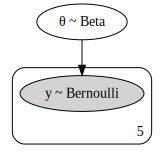

In [14]:
data = [0,1,1,1,0]
with pm.Model() as coin_model:
    θ = pm.Beta('θ', alpha=3, beta=2)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000, tune=1000)
pm.model_to_graphviz(coin_model)

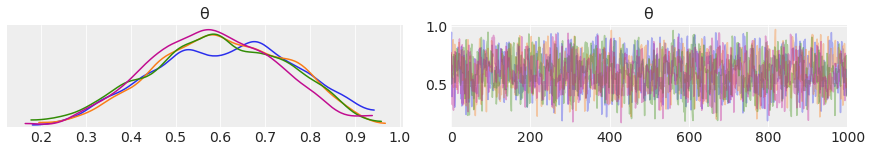

,mean,sd,mc error,hpd 3%,hpd 97%,eff_n,r_hat
θ,0.59,0.15,0.01,0.32,0.87,1786.0,1.0


In [13]:
az.plot_trace(trace)
plt.show()
az.summary(trace)